# Problem 5

## Self Inductance Formula
$$
L_{\text{self}} = \frac{\mu}{2\pi} l \left[ \ln \left( \frac{l}{r} + \sqrt{1 + \frac{l^2}{r^2}} \right) - \sqrt{1 + \frac{r^2}{l^2} + \frac{r}{l} + \frac{1}{4}} \right]
$$

* l = length in meters
* r = radius in meters
* $\mu$ = 4($\pi$) x 10E-7 H/m

Necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Making the formula into a function:

In [36]:
def selfInduct(r: float, l: float) -> float:
    # Constant for mu
    mu = (4 * np.pi) * (10 ** -7)
    
    # The actual formula
    lSelf = 0
    
    if (l > r):
        # Convert from mm to cm
        r * 1e-1
        l * 1e-1
        
        lSelf = (.002 * l) * (np.log((2 * l) / r) - (3 / 4)) # returns uH/cm
        lSelf *= 100 # puts in back in nH/mm
    else:
        # Convert from mm to m
        r *= 1e-3
        l *= 1e-3
        
        outside = ((mu / (2 * np.pi)) * l)
        inside1 = np.log((l / r) + np.sqrt(1 + ((l ** 2) / (r ** 2))))
        inside2 = np.sqrt(1 + ((r ** 2) / (l ** 2)))
        lSelf = outside * (inside1 - inside2 + (r / l) + (1 / 4))
        # returns in henries / m, so make it into nano henries / mm
        lSelf *= 1e6
    
    return lSelf # Returns H/m

Make a range of radii:

In [45]:
# Arranging an array from .5 mils to 5 mils (0.0000127m to 0.000127m)
radii = np.linspace(0.5, 5, 15) # This is in mils
# Convert to m then to mm
radii *= (2.54e-5)
radii *= (1e3)

print(radii)

[0.0127     0.02086429 0.02902857 0.03719286 0.04535714 0.05352143
 0.06168571 0.06985    0.07801429 0.08617857 0.09434286 0.10250714
 0.11067143 0.11883571 0.127     ]


Calculate the inductances:

In [46]:
len = 10 # This is in mm

# Generate a list of inductances to plot
lSelfs = []

for rad in radii:
    induct = selfInduct(rad, len)
    lSelfs.append(induct) # These are in Henries
    
print("Self inductances in nH/mm:\n", lSelfs)

Self inductances in nH/mm:
 [13.223771118143162, 12.230897345515382, 11.57041397177423, 11.074741643965066, 10.67783976651739, 10.346810889562244, 10.062870367021471, 9.814274933666315, 9.593191184866667, 9.3941319941726, 9.213103979090937, 9.047110139949, 8.893843687907168, 8.75149113097138, 8.618600932155074]


Calculate the inductances using the rule of thumb:

In [47]:
# Rule of thumb is ~1 nH/mm (1uH/m)
lSelfs_rot = np.full(15, 10) # Length doesn't change so its always the same.
print(lSelfs_rot)


[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]


Plot the values:

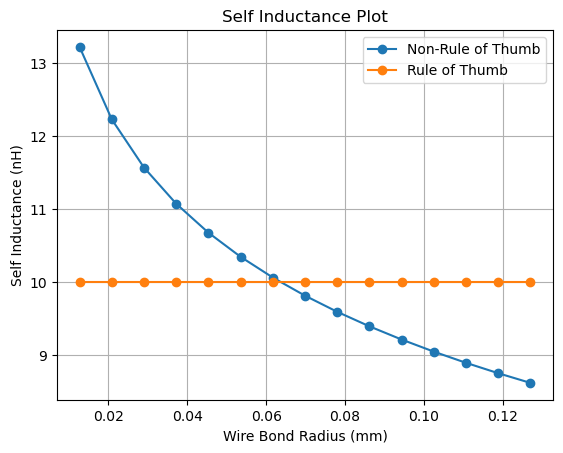

In [48]:
fig, ax = plt.subplots()

ax.plot(radii, lSelfs, marker='o', linestyle='-', label='Non-Rule of Thumb')
ax.plot(radii, lSelfs_rot, marker='o', linestyle='-', label='Rule of Thumb')

ax.set(xlabel='Wire Bond Radius (mm)', ylabel='Self Inductance (nH)',
       title="Self Inductance Plot")
ax.grid()
ax.legend()

The rule of thumb line never changes due to the constant length unlike the non-rule of thumb
line with its changing radius. In contrast to the previous problem, the line is a downward curve instead of a slightly curved and upward line b/c of modification in having a varying length vs a varying radius.